[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/codebysumit/100-days-of-deep-learning-challenge/blob/master/Day%203/gradient_descent.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
from matplotlib import rc
rc('animation', html='jshtml')

In [3]:
from IPython.display import HTML
from base64 import b64encode

In [4]:
HTML('''
<iframe src="https://www.desmos.com/calculator/ij9wdqcddo?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>
''')

# f(x) = x^2

In [ ]:
def y_function(x):
  return x**2

In [ ]:
def y_derivative(x):
  # x^2 = d(x^2)/d(x) = 2*x
  return 2*x

In [ ]:
x = np.arange(-100, 100, 0.1)
y = y_function(x)

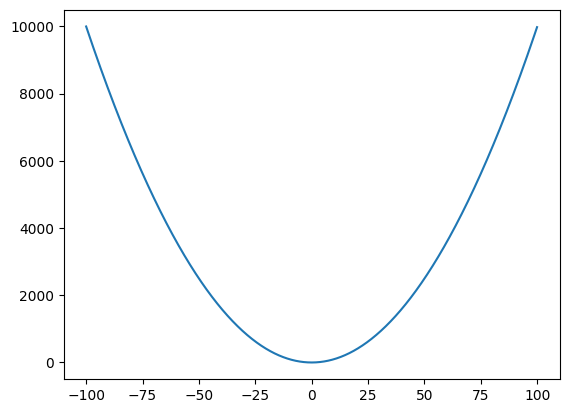

In [ ]:
plt.plot(x, y)
plt.show()

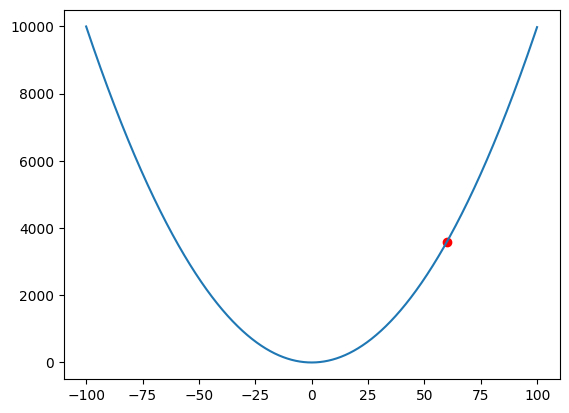

In [ ]:
curr_pos = (60, y_function(60))

plt.plot(x, y)
plt.scatter(curr_pos[0], curr_pos[1], color="red")
plt.show()

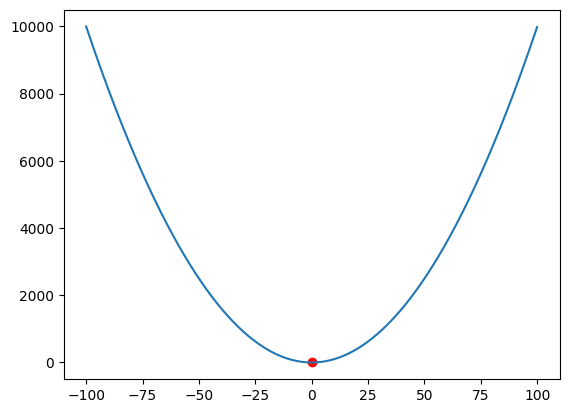

In [ ]:
lr = 0.01
epoch = 1000

for _ in range(epoch):
  x_new = curr_pos[0] - lr*y_derivative(curr_pos[0])
  y_new = y_function(x_new)

  curr_pos = (x_new, y_new)

  # plt.plot(x, y)
  # plt.scatter(curr_pos[0], curr_pos[1], color="red")
  # plt.pause(0.01)
  # plt.show()

plt.plot(x, y)
plt.scatter(curr_pos[0], curr_pos[1], color="red")
plt.pause(0.01)
plt.show()


## Animation

In [ ]:
lr = 0.01
epoch = 400

curr_pos_p1 = (60, y_function(60))
# curr_pos_p2 = (-50, y_function(-50))

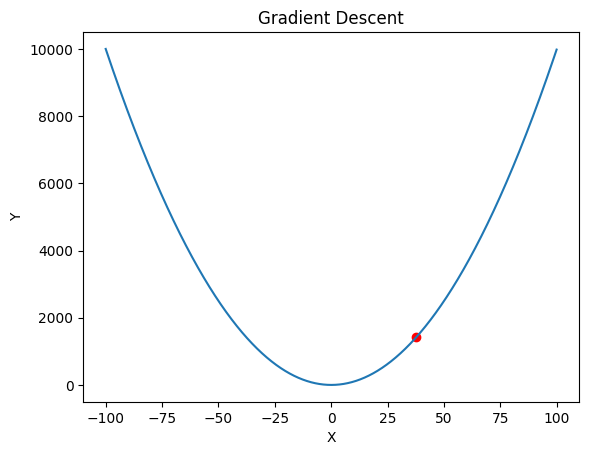

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title("Gradient Descent") # Corrected line
ax.set_xlabel("X")
ax.set_ylabel("Y")
anim_scatter_p1 = ax.scatter(curr_pos_p1[0], curr_pos_p1[1], color="red")
# anim_scatter_p2 = ax.scatter(curr_pos_p2[0], curr_pos_p2[1], color="blue")

In [ ]:
def update_anim(frame):
  global curr_pos_p1, curr_pos_p2, anim_scatter_p1, anim_scatter_p2

  # For point P1
  x_new = curr_pos_p1[0] - lr*y_derivative(curr_pos_p1[0])
  y_new = y_function(x_new)

  curr_pos_p1 = (x_new, y_new)

  # # For point P2
  # x_new = curr_pos_p2[0] - ir*y_derivative(curr_pos_p2[0])
  # y_new = y_function(x_new)

  # curr_pos_p2 = (x_new, y_new)


  # Update data for the scatter plot
  anim_scatter_p1.set_offsets(curr_pos_p1)
  # anim_scatter_p2.set_offsets(curr_pos_p2)

  return anim_scatter_p1,
  # return anim_scatter_p1, anim_scatter_p2

In [ ]:
def update_anim(frame):
  global curr_pos_p1, anim_scatter_p1, tangent_line

  # For point P1
  x_new = curr_pos_p1[0] - lr*y_derivative(curr_pos_p1[0])
  y_new = y_function(x_new)

  curr_pos_p1 = (x_new, y_new)

  # Update data for the scatter plot
  anim_scatter_p1.set_offsets(curr_pos_p1)

  # Calculate and update the tangent line
  tangent_x = np.linspace(curr_pos_p1[0] - 20, curr_pos_p1[0] + 20, 100)
  tangent_y = y_function(curr_pos_p1[0]) + y_derivative(curr_pos_p1[0]) * (tangent_x - curr_pos_p1[0])

  if 'tangent_line' in globals() and tangent_line in ax.lines:
    tangent_line.set_data(tangent_x, tangent_y)
  else:
    tangent_line, = ax.plot(tangent_x, tangent_y, color='green', linestyle='--', linewidth=2) # Added linewidth

  return anim_scatter_p1, tangent_line

In [ ]:
lr = 0.01
epoch = 200

curr_pos_p1 = (60, y_function(60))

anim = animation.FuncAnimation(
    fig=fig,
    func=update_anim,
    frames=epoch,
    interval=10,
    blit=True,
    repeat=False
  )

In [ ]:
anim

In [ ]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Sumit'), bitrate=1800)

anim.save('gradient_descent.mp4', writer=writer)

In [ ]:
mp4 = open('gradient_descent.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# f(x) = sin(x)

In [ ]:
def y_function(x):
  return np.sin(x)

In [ ]:
def y_derivative(x):
  return np.cos(x)

In [ ]:
x = np.arange(-5, 5, 0.1)
y = y_function(x)

curr_pos_p1 = (1.5, y_function(1.5))

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title("Gradient Descent") # Corrected line
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

anim_scatter_p1 = ax.scatter(curr_pos_p1[0], curr_pos_p1[1], color="red")

In [ ]:
def update_anim(frame):
  global curr_pos_p1, anim_scatter_p1, tangent_line

  # For point P1
  x_new = curr_pos_p1[0] - lr*y_derivative(curr_pos_p1[0])
  y_new = y_function(x_new)

  curr_pos_p1 = (x_new, y_new)

  # Update data for the scatter plot
  anim_scatter_p1.set_offsets(curr_pos_p1)

  # Calculate and update the tangent line
  tangent_x = np.linspace(curr_pos_p1[0] - 1, curr_pos_p1[0] + 1, 100)
  tangent_y = y_function(curr_pos_p1[0]) + y_derivative(curr_pos_p1[0]) * (tangent_x - curr_pos_p1[0])

  if 'tangent_line' in globals() and tangent_line in ax.lines:
    tangent_line.set_data(tangent_x, tangent_y)
  else:
    tangent_line, = ax.plot(tangent_x, tangent_y, color='green', linestyle='--', linewidth=2) # Added linewidth

  return anim_scatter_p1, tangent_line

In [ ]:
lr = 0.01
epoch = 1000

curr_pos_p1 = (1.5, y_function(1.5))

anim = animation.FuncAnimation(
    fig=fig,
    func=update_anim,
    frames=epoch,
    interval=10,
    blit=True,
    repeat=False
  )

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Sumit'), bitrate=1800)

anim.save('gradient_descent.mp4', writer=writer)

mp4 = open('gradient_descent.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# f(x, y) = sin(5*x) * cos(5*y)/5

In [ ]:
def z_function(x, y):
  return np.sin(5 * x) * np.cos(5 * y) / 5

In [ ]:
def calculate_gradient(x, y):
  return np.cos(5 * x) * np.cos(5 * y) / 5, -np.sin(5 * x) * np.sin(5 * y)

In [ ]:
x = np.arange(-1, 1, 0.05)
y = np.arange(-1, 1, 0.05)

In [ ]:
X, Y = np.meshgrid(x, y)

Z = z_function(X, Y)

In [ ]:
curr_pos = (0.7, 0.4, z_function(0.7, 0.4))

In [ ]:
fig, ax = plt.subplots(
    subplot_kw={'projection': '3d'}
)

ax.plot_surface(X, Y, Z, cmap='viridis', zorder=0, alpha=0.35)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# # Set explicit limits based on your data range and current position
# ax.set_xlim(x.min(), x.max())
# ax.set_ylim(y.min(), y.max())
# ax.set_zlim(Z.min(), Z.max())


anim_scatter = ax.scatter(curr_pos[0], curr_pos[1], curr_pos[2], color="red", zorder=1)

plt.show()

In [ ]:
def update_anim(frame):
  global curr_pos, anim_scatter

  x_derivative, y_derivative = calculate_gradient(curr_pos[0], curr_pos[1])

  x_new = curr_pos[0] - lr*x_derivative
  y_new = curr_pos[1] - lr*y_derivative

  curr_pos = (x_new, y_new, z_function(x_new, y_new))

  # Update the x, y, z-data separately for 3D scatter
  anim_scatter._offsets3d = (np.array([curr_pos[0]]), np.array([curr_pos[1]]), np.array([curr_pos[2]]))


  return anim_scatter,

In [ ]:
lr = 0.01
epoch = 200

curr_pos = (0.7, 0.4, z_function(0.7, 0.4))

In [ ]:
anim = animation.FuncAnimation(
    fig=fig,
    func=update_anim,
    frames=epoch,
    interval=10,
    blit=True,
    repeat=False
  )

In [ ]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Sumit'), bitrate=1800)

anim.save('gradient_descent.mp4', writer=writer)

mp4 = open('gradient_descent.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)